# Import Packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [0]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Exploratory Data Analysis

In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data['CustomerID'].nunique()

200

There are 200 unique customers

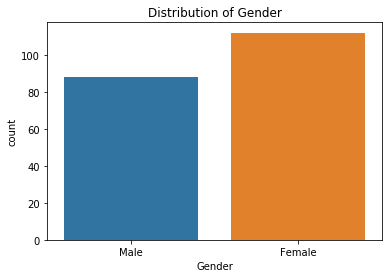

In [7]:
sns.countplot(x='Gender', data=data);
plt.title('Distribution of Gender');

There are more women than men in this data set

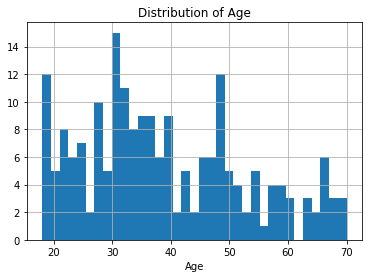

In [8]:
data.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

There are mostly age 30 to 40

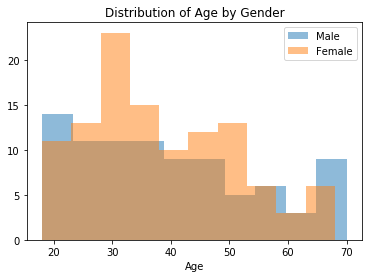

In [10]:
plt.hist('Age', data=data[data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=data[data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

Descriptive Statistics

In [0]:
data['Annual Income (k$)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
10%       23.900000
20%       37.800000
30%       46.000000
40%       54.000000
50%       61.500000
60%       67.000000
70%       74.300000
80%       78.200000
90%       93.400000
max      137.000000
Name: Annual Income (k$), dtype: float64

The annual income ranges from 15 to 137 with an average (median) annual income is 61 k$.

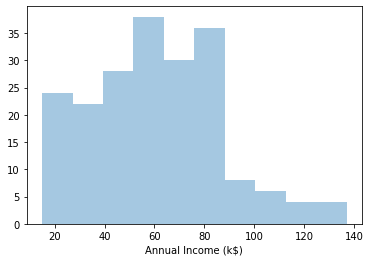

In [0]:
sns.distplot(data['Annual Income (k$)'], kde=False)

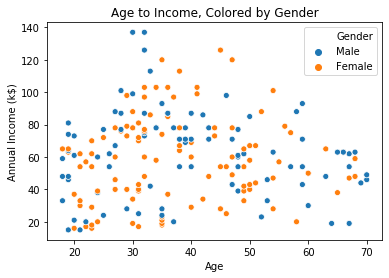

In [14]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=data);
plt.title('Age to Income, Colored by Gender');

In [0]:
data['Spending Score (1-100)'].describe(np.arange(0.1, 1, 0.1))

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
10%       13.000000
20%       26.000000
30%       40.000000
40%       45.600000
50%       50.000000
60%       55.000000
70%       61.600000
80%       75.000000
90%       87.100000
max       99.000000
Name: Spending Score (1-100), dtype: float64

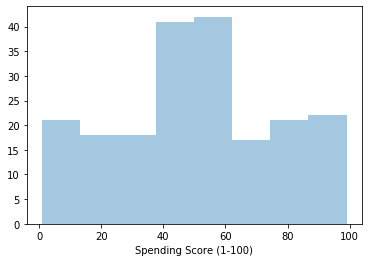

In [0]:
sns.distplot(data['Spending Score (1-100)'], kde=False)

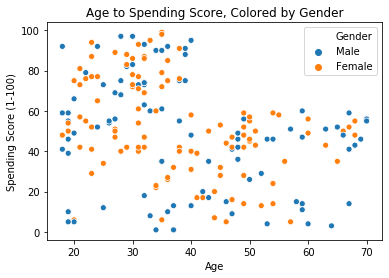

In [16]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Gender', data=data);
plt.title('Age to Spending Score, Colored by Gender');

# Clustering

In [0]:
from sklearn.cluster import KMeans

## Select Features

In [18]:
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Choosing Optimal

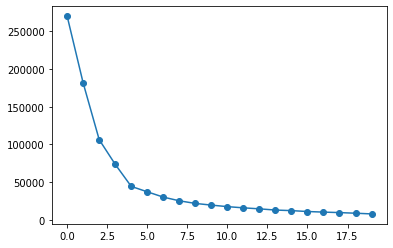

In [20]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use *k=5*.

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 5, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [23]:
new_data.head()

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


## Plot Centers and labels

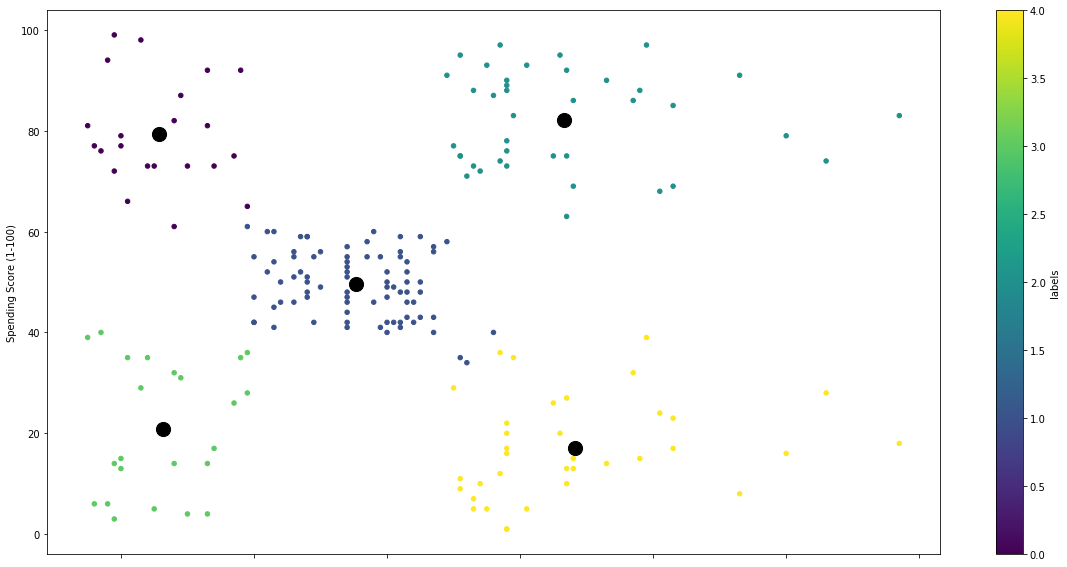

In [24]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='Annual Income (k$)', 
                      y='Spending Score (1-100)', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Explore to each cluster

In [25]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,22.000000,22.000000,22.0
mean,25.727273,79.363636,0.0
std,7.566731,10.504174,0.0
min,15.000000,61.000000,0.0
25%,19.250000,73.000000,0.0
50%,24.500000,77.000000,0.0
75%,32.250000,85.750000,0.0
max,39.000000,99.000000,0.0


Cluster 0: Medium Income & Medium Spend

In [26]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,81.000000,81.000000,81.0
mean,55.296296,49.518519,1.0
std,8.988109,6.530909,0.0
min,39.000000,34.000000,1.0
25%,48.000000,44.000000,1.0
50%,54.000000,50.000000,1.0
75%,62.000000,55.000000,1.0
max,76.000000,61.000000,1.0


Cluster 1: High Income & Low Spend

In [27]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,39.000000,39.000000,39.0
mean,86.538462,82.128205,2.0
std,16.312485,9.364489,0.0
min,69.000000,63.000000,2.0
25%,75.500000,74.500000,2.0
50%,79.000000,83.000000,2.0
75%,95.000000,90.000000,2.0
max,137.000000,97.000000,2.0


Cluster 2: Low Income & Low Spend

In [28]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,23.000000,23.000000,23.0
mean,26.304348,20.913043,3.0
std,7.893811,13.017167,0.0
min,15.000000,3.000000,3.0
25%,19.500000,9.500000,3.0
50%,25.000000,17.000000,3.0
75%,33.000000,33.500000,3.0
max,39.000000,40.000000,3.0


Cluster 3: Low Income & High Spend

In [29]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,Annual Income (k$),Spending Score (1-100),labels
count,35.000000,35.000000,35.0
mean,88.200000,17.114286,4.0
std,16.399067,9.952154,0.0
min,70.000000,1.000000,4.0
25%,77.500000,10.000000,4.0
50%,85.000000,16.000000,4.0
75%,97.500000,23.500000,4.0
max,137.000000,39.000000,4.0


Cluster 4: High Income & High Spend